<a href="https://colab.research.google.com/github/marianomontes/infovis/blob/main/Pasos_Mariano_Montes%20Corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Pasos Caminados Mariano Montes


## Materia Visualización de la Información
Comisión: ECD.2023.B
Profesor: Diego Ariel Aizemberg

In [2]:
import duckdb as db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('Pasos Mariano Montes.csv')
data.sample(10)

,startDate;endDate;value
5718,2024/27/04 20:27:04;2024/30/27 20:30:27;284
5245,2024/14/32 21:14:32;2024/15/23 21:15:23;91
2361,2023/32/21 17:32:21;2023/32/23 17:32:23;8
6143,2024/04/15 20:04:15;2024/08/16 20:08:16;182
2031,2023/18/14 21:18:14;2023/27/49 21:27:49;406
3288,2024/05/59 14:05:59;2024/15/34 14:15:34;408
5830,2024/39/45 02:39:45;2024/39/48 02:39:48;9
1797,2023/34/03 15:34:03;2023/39/51 15:39:51;34
4623,2024/10/32 16:10:32;2024/20/32 16:20:32;75
490,2023/55/33 22:55:33;2023/04/26 23:04:26;170


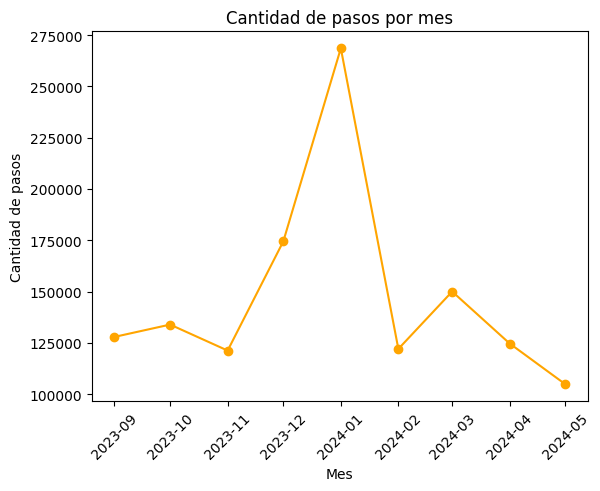

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir las fechas a tipo datetime utilizando el formato adecuado
data['startDate'] = pd.to_datetime(data['startDate'], format='%d/%m/%Y %H:%M')

# Agrupar los datos por mes y sumar los valores de pasos
monthly_data = data.groupby(data['startDate'].dt.to_period('M'))['value'].sum()

# Crear el gráfico de líneas
plt.plot(monthly_data.index.to_timestamp(), monthly_data.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pasos')
plt.title('Cantidad de pasos por mes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()



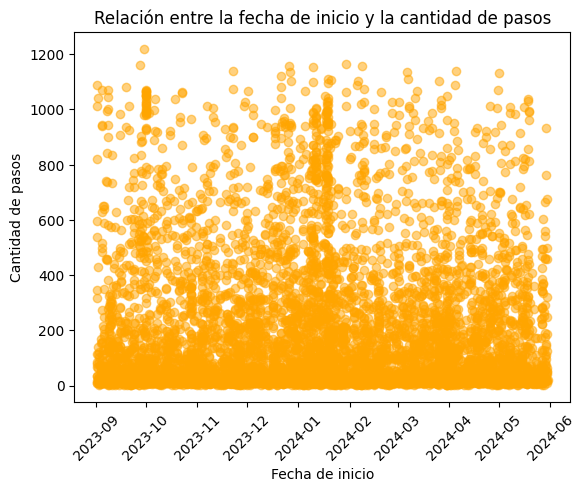

In [ ]:
plt.scatter(data['startDate'], data['value'], alpha=0.5, color='orange')  # alpha ajusta la transparencia de los puntos
plt.xlabel('Fecha de inicio')
plt.ylabel('Cantidad de pasos')
plt.title('Relación entre la fecha de inicio y la cantidad de pasos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


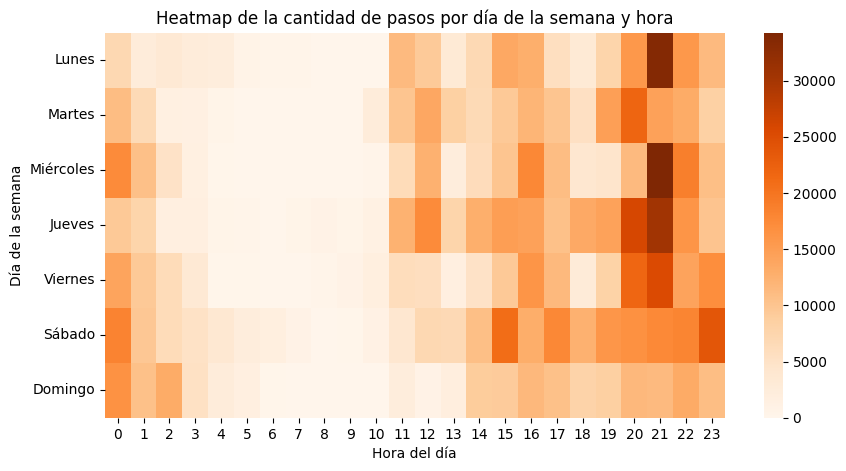

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes una base de datos llamada 'data' con los campos 'startDate', 'endDate' y 'value'

# Convertir las fechas a tipo datetime utilizando el formato adecuado (día/mes/año hora:minuto)
data['startDate'] = pd.to_datetime(data['startDate'], format='%d/%m/%Y %H:%M')
data['endDate'] = pd.to_datetime(data['endDate'], format='%d/%m/%Y %H:%M')

# Luego, crea una nueva columna 'day_of_week' que contenga el nombre del día de la semana en español
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
data['day_of_week'] = data['startDate'].dt.dayofweek.map(dias_semana)

# Crear una categoría ordenada para los días de la semana
ordered_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=ordered_days, ordered=True)

# Ahora, agrupa los datos por día de la semana y por hora, y suma los valores de 'value' para obtener la cantidad total de pasos
heatmap_data = data.groupby([data['day_of_week'], data['startDate'].dt.hour])['value'].sum().unstack()

# Crear el heatmap con la paleta de colores 'Oranges' (naranja)
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='Oranges')
plt.title('Heatmap de la cantidad de pasos por día de la semana y hora')
plt.xlabel('Hora del día')
plt.ylabel('Día de la semana')
plt.show()



# A continuación se rehicieron los gráficos con la librería Altair

In [4]:
pip install pandas altair vega_datasets

In [9]:
import pandas as pd
import altair as alt

# Cargar el DataFrame desde un archivo CSV con el separador ';'
data = pd.read_csv('Pasos Mariano Montes.csv', sep=';')

# Intentar convertir las fechas a tipo datetime sin especificar el formato
data['startDate'] = pd.to_datetime(data['startDate'], errors='coerce')

# Verificar si hay fechas no convertidas correctamente
if data['startDate'].isnull().any():
    print("Algunas fechas no se han convertido correctamente:")
    print(data[data['startDate'].isnull()])

# Filtrar filas con fechas no convertidas
data = data.dropna(subset=['startDate'])

# Agrupar los datos por mes y sumar los valores de pasos
monthly_data = data.groupby(data['startDate'].dt.to_period('M'))['value'].sum().reset_index()

# Convertir el período a timestamp para Altair
monthly_data['startDate'] = monthly_data['startDate'].dt.to_timestamp()

# Crear el gráfico de líneas con Altair
chart = alt.Chart(monthly_data).mark_line(point=True, color='orange').encode(
    x=alt.X('startDate:T', title='Mes', axis=alt.Axis(format='%b %Y', labelAngle=-45)),
    y=alt.Y('value:Q', title='Cantidad de pasos')
).properties(
    title='Cantidad de pasos por mes'
)

# Mostrar el gráfico
chart.display()




alt.Chart(...)

In [11]:
import pandas as pd
import altair as alt

# Configurar Altair para manejar más de 5000 filas
alt.data_transformers.disable_max_rows()

# Cargar el DataFrame desde un archivo CSV con el separador ';'
data = pd.read_csv('Pasos Mariano Montes.csv', sep=';')

# Intentar convertir las fechas a tipo datetime sin especificar el formato
data['startDate'] = pd.to_datetime(data['startDate'], errors='coerce')

# Verificar si hay fechas no convertidas correctamente
if data['startDate'].isnull().any():
    print("Algunas fechas no se han convertido correctamente:")
    print(data[data['startDate'].isnull()])

# Filtrar filas con fechas no convertidas
data = data.dropna(subset=['startDate'])

# Crear el gráfico de dispersión con Altair
scatter_chart = alt.Chart(data).mark_point(opacity=0.5, color='orange').encode(
    x=alt.X('startDate:T', title='Fecha de inicio', axis=alt.Axis(format='%b %Y', labelAngle=-45)),
    y=alt.Y('value:Q', title='Cantidad de pasos')
).properties(
    title='Relación entre la fecha de inicio y la cantidad de pasos'
)

# Mostrar el gráfico
scatter_chart.display()



alt.Chart(...)

In [12]:
import pandas as pd
import altair as alt

# Cargar el DataFrame desde un archivo CSV con el separador ';'
data = pd.read_csv('Pasos Mariano Montes.csv', sep=';')

# Intentar convertir las fechas a tipo datetime sin especificar el formato
data['startDate'] = pd.to_datetime(data['startDate'], errors='coerce')
data['endDate'] = pd.to_datetime(data['endDate'], errors='coerce')

# Verificar si hay fechas no convertidas correctamente
if data['startDate'].isnull().any() or data['endDate'].isnull().any():
    print("Algunas fechas no se han convertido correctamente:")
    print(data[data['startDate'].isnull() | data['endDate'].isnull()])

# Filtrar filas con fechas no convertidas
data = data.dropna(subset=['startDate', 'endDate'])

# Crear una nueva columna 'day_of_week' que contenga el nombre del día de la semana en español
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
data['day_of_week'] = data['startDate'].dt.dayofweek.map(dias_semana)

# Crear una categoría ordenada para los días de la semana
ordered_days = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=ordered_days, ordered=True)

# Agrupar los datos por día de la semana y por hora, y sumar los valores de 'value'
heatmap_data = data.groupby(['day_of_week', data['startDate'].dt.hour])['value'].sum().reset_index()

# Renombrar las columnas para que sean más descriptivas
heatmap_data.columns = ['Día de la semana', 'Hora del día', 'Cantidad de pasos']

# Crear el heatmap con Altair
heatmap = alt.Chart(heatmap_data).mark_rect().encode(
    x=alt.X('Hora del día:O', title='Hora del día'),
    y=alt.Y('Día de la semana:O', title='Día de la semana'),
    color=alt.Color('Cantidad de pasos:Q', scale=alt.Scale(scheme='oranges'), title='Cantidad de pasos')
).properties(
    title='Heatmap de la cantidad de pasos por día de la semana y hora',
    width=600,
    height=300
)

# Mostrar el gráfico
heatmap.display()


alt.Chart(...)